In [14]:
import pandas as pd
import numpy as np
from scipy.stats import t 
import statsmodels.api as sm

In [15]:
ds = pd.read_csv('A1.2 Felicidad y GDP.csv')

In [16]:
FSorted = ds.sort_values("Felicidad",ascending=False)
print("Top 10 paises por nivel de felicidad:")
print(FSorted.head(10))

Top 10 paises por nivel de felicidad:
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11


In [17]:
GDPSorted = ds.sort_values("GDP",ascending=False)
print("I)")
print("Top 10 paises por nivel de GPD:")
print(GDPSorted.head(10))

I)
Top 10 paises por nivel de GPD:
               Pais  Felicidad           GDP
15    United States     6.9768  2.089370e+13
70            China     5.5853  1.468770e+13
52            Japan     6.0389  5.040110e+12
13          Germany     7.0341  3.846410e+12
16   United Kingdom     6.9425  2.756900e+12
130           India     3.7771  2.667690e+12
19           France     6.6867  2.630320e+12
29            Italy     6.4667  1.892570e+12
14           Canada     7.0251  1.645420e+12
57      South Korea     5.9351  1.637900e+12


II)
Niveles de logartimo base 10 del GPD y de los niveles de felicidad:


<Axes: xlabel='Felicidad', ylabel='Log10GDP'>

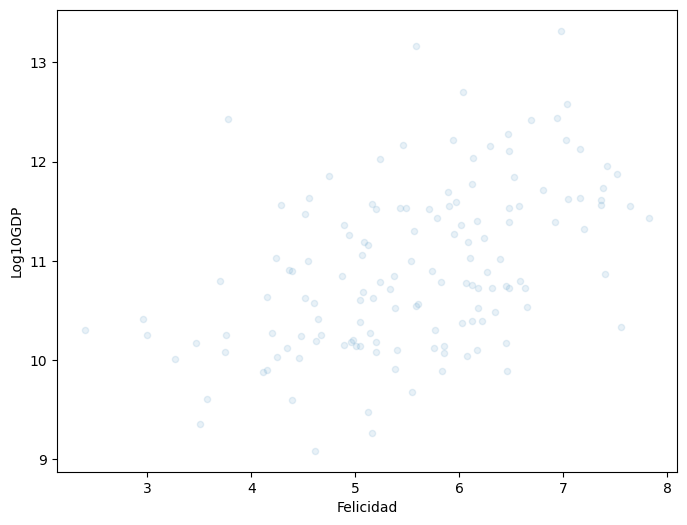

In [18]:
ds['Log10GDP'] = np.log10(ds['GDP'])
print("II)")
print("Niveles de logartimo base 10 del GPD y de los niveles de felicidad:")
ds.plot(kind='scatter', x='Felicidad', y='Log10GDP', alpha=0.1, figsize=(8,6))

In [19]:
x = ds['Log10GDP']
y = ds['Felicidad']
xmean = np.mean(x)
ymean = np.mean(y)
B1 = np.sum((x-xmean)*(y-ymean))/np.sum((x-xmean)**2)
B0 = ymean - B1*xmean

print("III)")
print("B1: ", B1)
print("B0: ", B0)

III)
B1:  0.628128465881041
B0:  -1.3023500570747295


IV)
Grafica con observaciones y linea de regresion


<Axes: xlabel='Log10GDP', ylabel='Felicidad'>

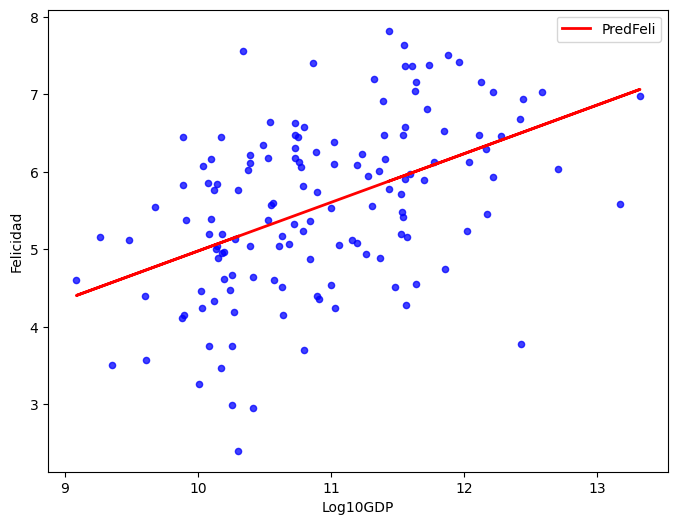

In [20]:
ds['PredFeli'] = B0 + B1 * ds['Log10GDP']
print("IV)")
print("Grafica con observaciones y linea de regresion")
ax = ds.plot(kind='scatter', x='Log10GDP', y='Felicidad', alpha=0.75, color='blue', figsize=(8, 6))
ds.plot(x='Log10GDP', y='PredFeli', color='red', ax=ax, linestyle='-', linewidth=2)


In [21]:
RSS = np.sum((y - ds['PredFeli'])**2)
print("V)")
print("RSS: ", RSS)

V)
RSS:  131.3738317732635


In [22]:
n = len(x)
SE = np.sqrt(RSS / ((n - 2) * np.sum((x - xmean) ** 2)))
alpha = 0.05
estad_T = B1/(SE)
crit_T = t.ppf(1- alpha/2,df=n -2 )
IntervaloConf = (B1 - crit_T*(SE*B1)),(B1 + crit_T*(SE*B1))


print("VI)")
print("SE: ", SE)
print("Intervalo de Confianza de B1: ",IntervaloConf)
print("Prueba usando estadistico T: ", estad_T)
print("Valor critico de T: ", crit_T)
if abs(estad_T) > crit_T:
     print("La asociación entre la felicidad y el GDP es significativa en esta población.")
else:
    print("La asociación entre la felicidad y el GDP no es significativa en esta población.")



VI)
SE:  0.09983378435340727
Intervalo de Confianza de B1:  (np.float64(0.5041427315996704), np.float64(0.7521142001624116))
Prueba usando estadistico T:  6.291742519320849
Valor critico de T:  1.977177724476122
La asociación entre la felicidad y el GDP es significativa en esta población.


In [26]:
RSE = np.sqrt(RSS/(n-2))
TSS = np.sum((y-ymean)**2)
ESS = np.sum((ds['PredFeli']-ymean)**2)
PruebaTSS = RSS + ESS
R2 = 1-(RSS/TSS)
print("VII)")
print("RSE: ", RSE)
print("TSS: ",TSS)
print("TSS por ESS+RSS: ",PruebaTSS)
print("R cuadrada: ",R2)

VII)
RSE:  0.9721807858537376
TSS:  168.78798751626567
TSS por ESS+RSS:  168.78798751626567
R cuadrada:  0.22166361654970657


In [27]:
X = sm.add_constant(x)
ModelOLS = sm.OLS(y,X)
var = ModelOLS.fit()
print("VIII)")
print(var.summary())
print("Valores P: ",var.pvalues)
print("RSE:", np.sqrt(var.scale))

VIII)
                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 26 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        23:28:40   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191   